In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, f1_score, recall_score                               

# Data Preprocessing project

## Reading the dataframe

In [2]:
data = pd.read_csv('banknotes.csv' )
data

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
0,0,214.8,131.0,131.1,9.0,9.7,141.0
1,0,214.6,129.7,129.7,8.1,9.5,141.7
2,0,214.8,129.7,129.7,8.7,9.6,142.2
3,0,214.8,129.7,129.6,7.5,10.4,142.0
4,0,215.0,129.6,129.7,10.4,7.7,141.8
...,...,...,...,...,...,...,...
195,1,215.0,130.4,130.3,9.9,12.1,139.6
196,1,215.1,130.3,129.9,10.3,11.5,139.7
197,1,214.8,130.3,130.4,10.6,11.1,140.0
198,1,214.7,130.7,130.8,11.2,11.2,139.4


<Figure size 1600x900 with 0 Axes>

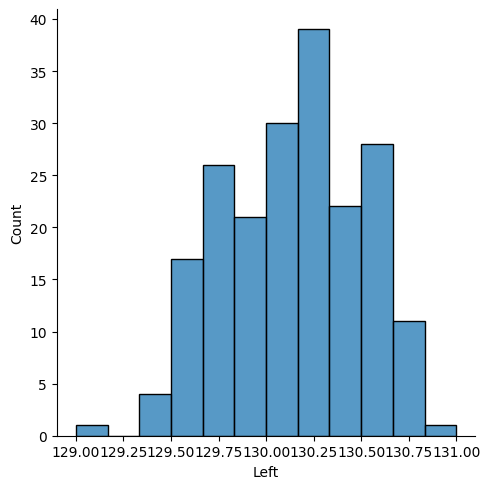

In [25]:
plt.figure(figsize=(16, 9))
sn.displot(data['Left'])

<Figure size 1600x900 with 0 Axes>

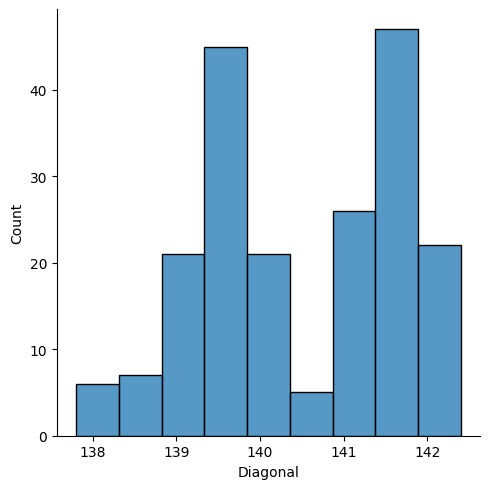

In [26]:
plt.figure(figsize=(16, 9))
sn.displot(data['Diagonal'])

## Separating the dataset into independent(X) and dependent(Y) variables

In [4]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

## Summary statistics

In [5]:
X.describe()

,Length,Left,Right,Bottom,Top,Diagonal
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,214.896000,130.121500,129.956500,9.417500,10.650500,140.483500
std,0.376554,0.361026,0.404072,1.444603,0.802947,1.152266
min,213.800000,129.000000,129.000000,7.200000,7.700000,137.800000
25%,214.600000,129.900000,129.700000,8.200000,10.100000,139.500000
50%,214.900000,130.200000,130.000000,9.100000,10.600000,140.450000
75%,215.100000,130.400000,130.225000,10.600000,11.200000,141.500000
max,216.300000,131.000000,131.100000,12.700000,12.300000,142.400000


## Boxplots for the Numerical features to detect the outliers in each feature



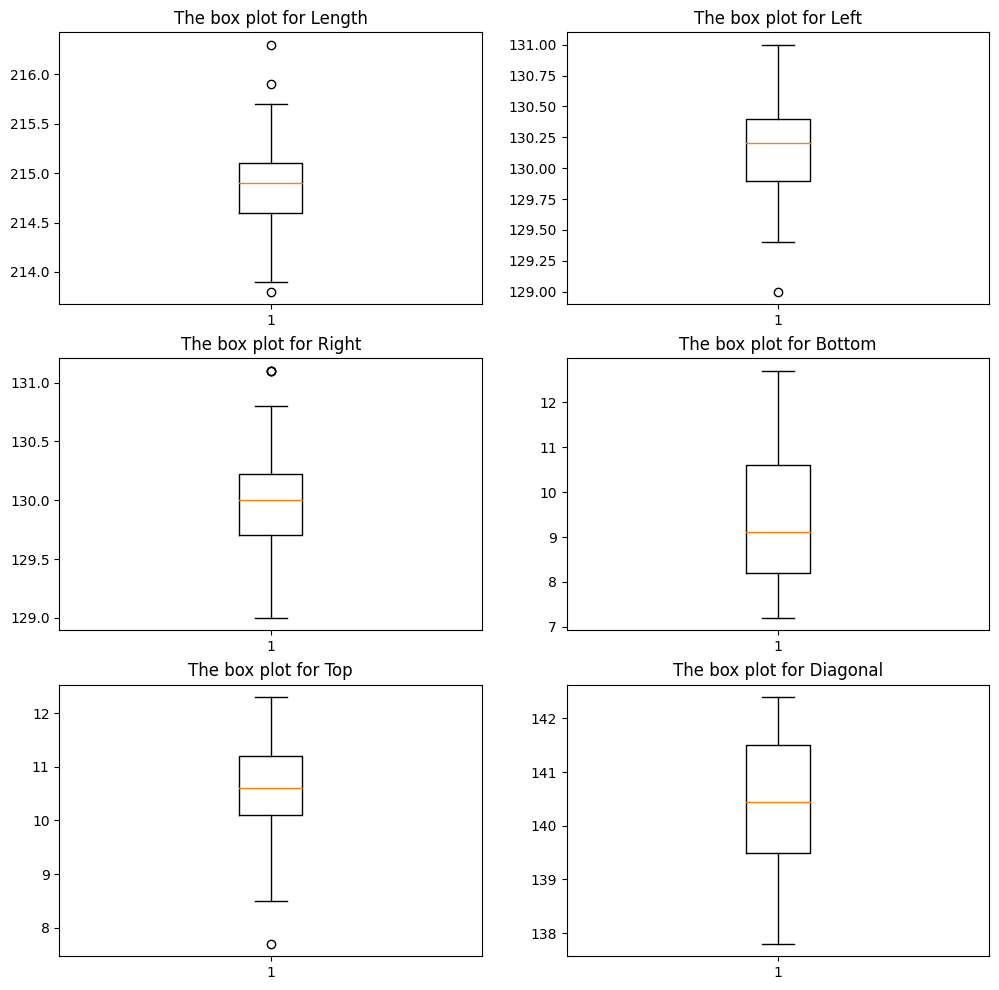

Text(0.5, 0.98, 'The graph for the numerical features')

<Figure size 640x480 with 0 Axes>

In [6]:
plt.figure(figsize = (12, 12))

columns = X.columns

for i, feature in enumerate(columns):
    ax = plt.subplot(3, 2, i + 1)
    ax.boxplot(X[feature])
    ax.set_title(f'The box plot for {feature}')
    
    
plt.show()
plt.suptitle(f'The graph for the numerical features')

### The Length, Left, Right, Top feature have outliers

Below is a function to handle the outlier by winsorizing

In [7]:
col = ['Length', 'Left', 'Right', 'Top']
def fixed_outlier(df):
    new_df = df.copy()
    
    for feature in col:
        lower_bound = np.quantile(df[feature], 0.1)
        upper_bound = np.quantile(df[feature], 0.9)
        print(f'lower bound for {feature} is {lower_bound}')
        print(f'upper bound for {feature} is {upper_bound}')
        print()
        
        new_df[feature] = np.clip(df[feature], lower_bound, upper_bound)
    return new_df

In [8]:
X = fixed_outlier(X)
X


lower bound for Length is 214.5
upper bound for Length is 215.4

lower bound for Left is 129.6
upper bound for Left is 130.6

lower bound for Right is 129.4
upper bound for Right is 130.4

lower bound for Top is 9.7
upper bound for Top is 11.8



,Length,Left,Right,Bottom,Top,Diagonal
0,214.8,130.6,130.4,9.0,9.7,141.0
1,214.6,129.7,129.7,8.1,9.7,141.7
2,214.8,129.7,129.7,8.7,9.7,142.2
3,214.8,129.7,129.6,7.5,10.4,142.0
4,215.0,129.6,129.7,10.4,9.7,141.8
...,...,...,...,...,...,...
195,215.0,130.4,130.3,9.9,11.8,139.6
196,215.1,130.3,129.9,10.3,11.5,139.7
197,214.8,130.3,130.4,10.6,11.1,140.0
198,214.7,130.6,130.4,11.2,11.2,139.4


### The boxplot for the numerical features to show that the outliers have been fixed

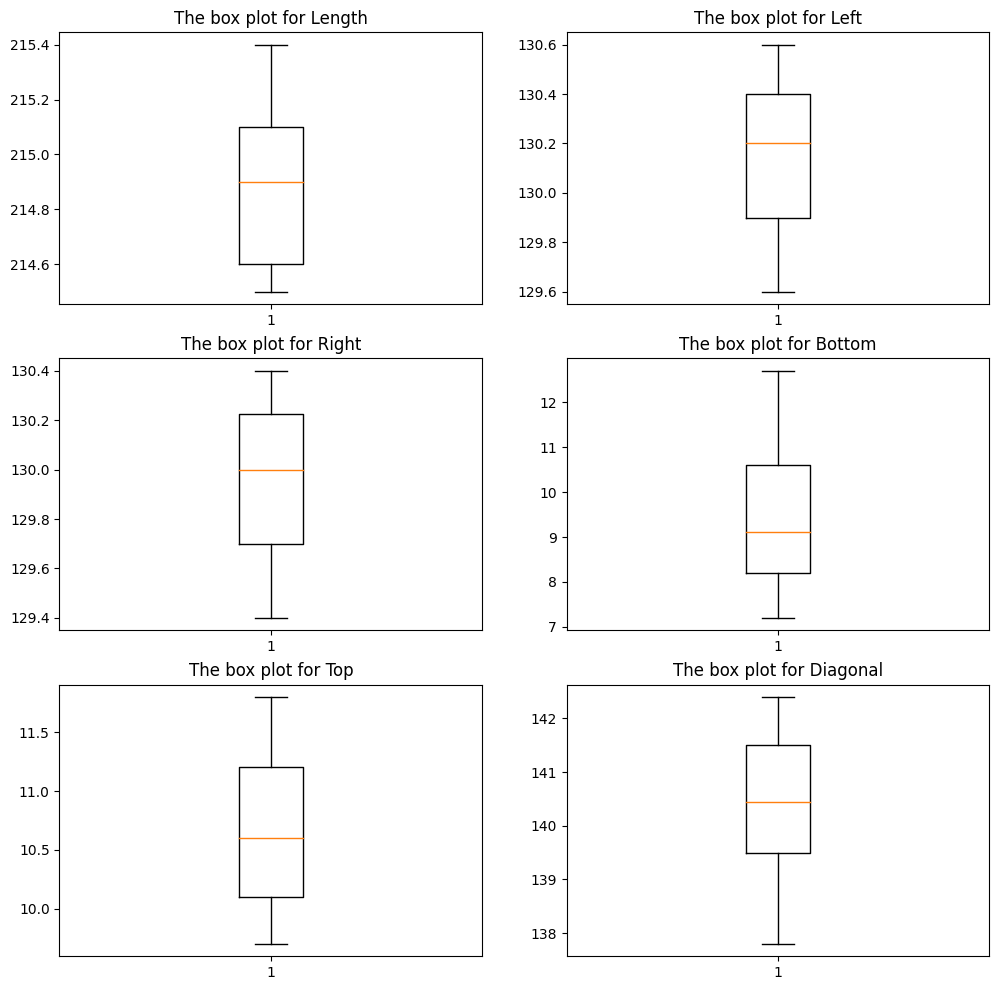

Text(0.5, 0.98, 'The graph for the numerical features')

<Figure size 640x480 with 0 Axes>

In [9]:
plt.figure(figsize = (12, 12))

for i, feature in enumerate(columns):
    ax = plt.subplot(3, 2, i + 1)
    ax.boxplot(X[feature])
    ax.set_title(f'The box plot for {feature}')
    
    
plt.show()
plt.suptitle(f'The graph for the numerical features')

## Data Splitting 

Splitting the data into train and test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 4)
X_train

,Length,Left,Right,Bottom,Top,Diagonal
110,215.2,130.4,130.3,8.0,11.5,139.2
154,214.5,130.3,130.0,11.0,11.5,139.5
16,214.6,129.9,130.1,8.2,9.8,141.7
19,214.7,130.2,129.9,8.6,10.0,141.9
2,214.8,129.7,129.7,8.7,9.7,142.2
...,...,...,...,...,...,...
104,214.7,130.2,130.3,11.8,10.9,139.7
129,214.5,130.2,130.4,9.8,11.8,139.9
183,214.6,130.5,130.4,10.1,11.4,139.3
174,214.8,130.1,130.0,11.4,10.5,139.6


## Feature scaling using the MinMaxScaler

In [11]:
scaler = MinMaxScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [12]:
X_train

,Length,Left,Right,Bottom,Top,Diagonal
0,0.777778,0.8,0.9,0.156863,0.857143,0.311111
1,0.000000,0.7,0.6,0.745098,0.857143,0.377778
2,0.111111,0.3,0.7,0.196078,0.047619,0.866667
3,0.222222,0.6,0.5,0.274510,0.142857,0.911111
4,0.333333,0.1,0.3,0.294118,0.000000,0.977778
...,...,...,...,...,...,...
145,0.222222,0.6,0.9,0.901961,0.571429,0.422222
146,0.000000,0.6,1.0,0.509804,1.000000,0.466667
147,0.111111,0.9,1.0,0.568627,0.809524,0.333333
148,0.333333,0.5,0.6,0.823529,0.380952,0.400000


k_best = SelectKBest(score_func=chi2, k = )
chi_best = k_best.fit(X_train, y_train)

np.set_printoptions(precision=4)
print(chi_best.scores_)

best_features = chi_best.transform(X_train)
best_feature = chi_best.transform(X_test)
print(best_features[0:6, :])

## Model building

In [13]:
model = LogisticRegression(random_state = 58)

In [14]:
model.fit(X_train, y_train)

LogisticRegression(random_state=58)

In [15]:
result = model.predict(X_test)

## Evaluation

In [16]:
print(accuracy_score(result, y_test))

0.98


In [17]:
print(precision_score(result, y_test))

1.0


In [18]:
print(recall_score(result, y_test))

0.9642857142857143


In [19]:
print(f1_score(result, y_test))

0.9818181818181818


In [20]:
print(confusion_matrix(result, y_test))

[[22  0]
 [ 1 27]]


In [21]:
print(classification_report(result, y_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.96      0.98        28

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

